# 0.0 Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

import matplotlib  
from matplotlib              import pyplot as plt
from matplotlib              import gridspec

from IPython.core.display    import HTML
from IPython.display         import Image

import re

## 0.1 Helper Functions

In [2]:
# show all columns
pd.set_option('display.max_columns', None)

#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 40
    
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def percentage_pandas(df1, df_total ):
    percentage = df1.shape[0]/df_total.shape[0] *100
    return percentage
    
#cramer V Function
def cramer_v( x, y ):
    cm = np.asmatrix ( pd.crosstab( x, y ) )
    n = cm.sum()
    r,k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1) * (r-1) / (n-1) )
    
    kcorr = k - (k-1)**2 / (n-1)
    rcorr = r - (r-1)**2 / (n-1)
    
    return np.sqrt( ( chi2corr / n ) / min( kcorr-1, rcorr-1 ) )

In [3]:
jupyter_settings()

## 0.2 Loading data

In [4]:
data_raw = pd.read_csv('../data/data_base/VivaReal_Itapema.csv')

In [5]:
data_raw.head()

,listing_id,link_name,link_url,listing_type,listing_title,listing_desc,business_types,unit_type,unit_subtype,property_type,usage_type,sale_price,rental_price,rental_period,yearly_iptu,monthly_condo_fee,amenities,usable_area,total_area,bathrooms,bedrooms,suites,parking_spaces,address_country,address_state,address_city,address_neighborhood,address_street,address_street_number,address_complement,address_zipcode,location_id,advertiser_id,advertiser_name,advertiser_phones,advertiser_whatsapp,advertiser_url,portal,aquisition_date,ano,mes,dia
0,2570403797,"Apartamento com 4 Quartos à venda, 187m²",https://www.vivareal.com.br/imovel/apartamento...,USED,"Apartamento com 4 dormitórios à venda, 187 m² ...",Situado em uma das melhores regiões da Meia Pr...,"[""SALE""]",APARTMENT,NaN,UNIT,RESIDENTIAL,2900000.00,NaN,NaN,0.00,0.00,"[""ELEVATOR"", ""SEA_VIEW""]",187.00,187.00,5.00,4.00,4.00,3.00,BR,SC,Itapema,Andorinha,NaN,NaN,NaN,88220000.00,BR>Santa Catarina>NULL>Itapema>Barrios>Meia Praia,39507409-01f8-3935-dc38-e0fea684b44a,Winner Brokers,"[""44984349088""]",44984349088.00,https://www.vivareal.com.br/770696/winner-brok...,GRUPOZAP,2022-12-06 00:00:00.000,2022,12,6
1,2510420914,"Apartamento com 4 Quartos à venda, 253m²",https://www.vivareal.com.br/imovel/apartamento...,USED,Apartamento com 4 suítes 3 vagas em Itapema SC,"Apartamentos com 04 suítes, 03 vagas de garage...","[""SALE""]",APARTMENT,NaN,UNIT,RESIDENTIAL,3500000.00,NaN,NaN,NaN,NaN,"[""KITCHEN"", ""BALCONY""]",253.00,253.00,5.00,4.00,4.00,3.00,BR,SC,Itapema,NaN,NaN,NaN,NaN,88220000.00,BR>Santa Catarina>NULL>Itapema>Barrios>Meia Praia,cc5bc87d-b746-8b05-90f8-ef61f5020a69,FRANCA FERRAZ IMOBILIARIA,"[""4733630740"", ""47996961130""]",47996961130.00,https://www.vivareal.com.br/116267/franca-ferr...,GRUPOZAP,2022-12-06 00:00:00.000,2022,12,6
2,2594648655,"Apartamento com 4 Quartos à venda, 210m²",https://www.vivareal.com.br/imovel/apartamento...,USED,"Apartamento à venda, Centro, Itapema, SC","Apartamento à Venda, 210m² por R$ 3.000.000. C...","[""SALE""]",APARTMENT,NaN,UNIT,RESIDENTIAL,3000000.00,NaN,NaN,NaN,NaN,"[""POOL"", ""BARBECUE_GRILL"", ""BALCONY"", ""AIR_CON...",210.00,210.00,4.00,4.00,1.00,4.00,BR,SC,Itapema,Centro,Avenida Nereu Ramos,579,NaN,88220000.00,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,ac9f84ae-1363-d2aa-1a6d-4adf1631539f,ARBO IMÓVEIS,"[""11999293012""]",11999293012.00,https://www.vivareal.com.br/656548/arbo-imoveis/,GRUPOZAP,2022-12-06 00:00:00.000,2022,12,6
3,2578754365,"Apartamento com 4 Quartos à venda, 213m²",https://www.vivareal.com.br/imovel/apartamento...,USED,Apartamento - Itapema SC,Apartamento à venda no Saint Laurent Residence...,"[""SALE""]",APARTMENT,NaN,UNIT,RESIDENTIAL,3412500.00,NaN,NaN,NaN,NaN,[],213.00,213.00,5.00,4.00,4.00,3.00,BR,SC,Itapema,Meia Praia,Rua 291,NaN,NaN,88220000.00,BR>Santa Catarina>NULL>Itapema>Barrios>Meia Praia,ad814d8a-6f4f-9201-33b9-aa833063206a,Arlete Imóveis,"[""4733694218""]",NaN,https://www.vivareal.com.br/620916/arlete-imov...,GRUPOZAP,2022-12-06 00:00:00.000,2022,12,6
4,2580894364,"Apartamento com 3 Quartos à venda, 5000m²",https://www.vivareal.com.br/imovel/apartamento...,USED,Diferenciado apartamento com suíte em Balneário,"Apartamento à Venda, 142960m² por R$ 3.127.000...","[""SALE""]",APARTMENT,NaN,UNIT,RESIDENTIAL,3127000.00,NaN,NaN,368.00,1182.00,"[""FURNISHED"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""G...",5000.00,258.00,3.00,3.00,1.00,2.00,BR,SC,Itapema,Centro,NaN,NaN,NaN,88220000.00,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,589beebf-65a6-0d3e-4897-a0adece5395d,ARBO IMÓVEIS,"[""1140033793"", ""11999293012""]",11999293012.00,https://www.vivareal.com.br/744943/arbo-imoveis/,GRUPOZAP,2022-12-06 00:00:00.000,2022,12,6


In [6]:
data_raw.columns

Index(['listing_id', 'link_name', 'link_url', 'listing_type', 'listing_title',
       'listing_desc', 'business_types', 'unit_type', 'unit_subtype',
       'property_type', 'usage_type', 'sale_price', 'rental_price',
       'rental_period', 'yearly_iptu', 'monthly_condo_fee', 'amenities',
       'usable_area', 'total_area', 'bathrooms', 'bedrooms', 'suites',
       'parking_spaces', 'address_country', 'address_state', 'address_city',
       'address_neighborhood', 'address_street', 'address_street_number',
       'address_complement', 'address_zipcode', 'location_id', 'advertiser_id',
       'advertiser_name', 'advertiser_phones', 'advertiser_whatsapp',
       'advertiser_url', 'portal', 'aquisition_date', 'ano', 'mes', 'dia'],
      dtype='object')

**Descrição das variáveis**

**'listing_id':** Identificação

**'link_name':** Descrição anuncio

**'link_url':** url  

**'listing_type':** idade  

**'listing_title':** titulo do anuncio  

**'listing_desc':** descrição completa do imóvel  

**'business_types':** Venda - aluguel  

**'unit_type':** Tipo de imóvel  

**'unit_subtype':**  

**'property_type':** residencial - comercial   

**'usage_type':** utilização residencial - comercial  

**'sale_price':** preço de venda  

**'rental_price':** preço aluguel  

**'rental_period':** periodo de aluguel  

**'yearly_iptu':** valor do iptu  

**'monthly_condo_fee':** taxa de condomínio  

**'amenities':** comodidades  

**'usable_area':** área util  

**'total_area':** área total  

**'bathrooms':** número banheiros  

**'bedrooms':** número de quartos  

**'suites':** número de suítes  

**'parking_spaces':** número de vagas  

**'address_country':** país  

**'address_state':** estado  

**'address_city':** cidade  

**'address_neighborhood':** bairro  

**'address_street':** endereço  

**'address_street_number':** número do imóvel  

**'address_complement':** complemento endereço  

**'address_zipcode':** CEP  

**'location_id':** localização  

**'advertiser_id':** identificador anuncio    

**'advertiser_name':** nome do anunciante  

**'advertiser_phones':** telefone anunciante    

**'advertiser_whatsapp':** whatsapp anunciante  

**'advertiser_url':** url anunciante  

**'portal':**  

**'aquisition_date':** data da coleta da informação  

**'ano':** ano da coleta coleta da informação  

**'mes':** mes da coleta coleta da informação  

**'dia':** dia da coleta da informação  


# 1.0 Data description

In [7]:
df1 = data_raw.copy()

## 1.1 Data Dimension

In [8]:
# Dimensão do dataframe e dimensionalidade
print('Numero de colunas do dataframe:  {} '.format(df1.shape[1]) )
print('\nNumero de linhas do dataframe: {} '.format(df1.shape[0]) )

Numero de colunas do dataframe:  42 

Numero de linhas do dataframe: 17547 


## 1.2 Data Type

In [9]:
df1.dtypes

listing_id                 int64
link_name                 object
link_url                  object
listing_type              object
listing_title             object
listing_desc              object
business_types            object
unit_type                 object
unit_subtype              object
property_type             object
usage_type                object
sale_price               float64
rental_price             float64
rental_period             object
yearly_iptu              float64
monthly_condo_fee        float64
amenities                 object
usable_area              float64
total_area               float64
bathrooms                float64
bedrooms                 float64
suites                   float64
parking_spaces           float64
address_country           object
address_state             object
address_city              object
address_neighborhood      object
address_street            object
address_street_number     object
address_complement       float64
address_zi

## 1.3 Check Na's

In [10]:
df1.isna().sum()

listing_id                   0
link_name                    0
link_url                     0
listing_type                 0
listing_title               11
listing_desc                95
business_types               0
unit_type                    0
unit_subtype             17312
property_type                0
usage_type                   0
sale_price                1127
rental_price             16381
rental_period            16381
yearly_iptu               9938
monthly_condo_fee         9894
amenities                    0
usable_area                  6
total_area                2072
bathrooms                   40
bedrooms                    89
suites                    1239
parking_spaces             785
address_country              0
address_state                0
address_city                 0
address_neighborhood       942
address_street            6735
address_street_number     7199
address_complement       17547
address_zipcode             17
location_id                  0
advertis

## 1.4 Fill Na's

In [11]:
# listing_title               11
df1.listing_title = df1.listing_title.apply(lambda x: 'no_description' if pd.isna(x) else x )

# listing_desc                95
df1.listing_desc = df1.listing_desc.apply(lambda x: 'no_description' if pd.isna(x) else x )

# unit_subtype             17312
df1['unit_subtype'] = df1['unit_subtype'].apply(lambda x: 'no_description' if pd.isna(x) else x )

# sale_price                1127
df1 = df1.loc[~( (df1['sale_price'].isna())&(df1['rental_price'].isna()) )]
df1['sale_price'] = df1['sale_price'].apply(lambda x: 1 if pd.isna(x) else x )

# rental_price             16381
df1['rental_price'] = df1['rental_price'].apply(lambda x: 0 if pd.isna(x) else x )

# rental_period            16381
df1['rental_period'] = df1['rental_period'].apply(lambda x: 'venda' if pd.isna(x) else x )
df1['rental_period'].unique()

# yearly_iptu               9938
df1['yearly_iptu'] = df1['yearly_iptu'].apply(lambda x: 0 if pd.isna(x) else x )

# monthly_condo_fee         9894
df1['monthly_condo_fee'] = df1['monthly_condo_fee'].apply(lambda x: 0 if pd.isna(x) else x )

# usable_area                  6
df1['usable_area'] = df1['usable_area'].apply(lambda x: 0 if pd.isna(x) else x )

# total_area                2072
df1['total_area'] =  df1['total_area'].apply(lambda x: 0 if pd.isna(x) else x )

# bathrooms                   40
df1['bathrooms'] = df1['bathrooms'].apply(lambda x: 0 if pd.isna(x) else x )

# bedrooms                    89
df1['bedrooms'] =df1['bedrooms'].apply(lambda x: 0 if pd.isna(x) else x )

# suites                    1239
regex4 = r'(\d suite)'
df1['suite2'] = df1['listing_desc'].apply(lambda x: (re.findall( regex4, x )))
df1['suite2'] = df1['suite2'].apply(lambda x: ''.join(x) )
df1['suite2'] = df1['suite2'].apply( lambda x: x[:1] )
df1['suite2'] = df1['suite2'].apply(lambda x: '0' if x ==''else x).astype(int)
df1['suites']  = df1.apply(lambda x: x['suite2'] if pd.isna(x['suites']) else x['suites'], axis = 1)

# parking_spaces             785
regex4 = r'(\d vaga)'
df1['parking_spaces2'] = df1['listing_desc'].apply(lambda x: (re.findall( regex4, x )))
df1['parking_spaces2'] = df1['parking_spaces2'].apply(lambda x: ''.join(x) )
df1['parking_spaces2'] = df1['parking_spaces2'].apply( lambda x: x[:1] )
df1['parking_spaces2'] = df1['parking_spaces2'].apply(lambda x: '0' if x ==''else x).astype(int)
df1['parking_spaces']  = df1.apply(lambda x: x['suite2'] if pd.isna(x['suites']) else x['suites'], axis = 1)

# address_neighborhood       942
df1['address_neighborhood']  = df1['address_neighborhood'].fillna('no_description')

# address_street            6735
df1['address_street']  = df1['address_street'].fillna('no_description')

# address_street_number     7199
df1['address_street_number']  = df1['address_street_number'].fillna('no_description')

# address_complement       17547
df1['address_complement']  = df1['address_complement'].fillna('no_description')

# advertiser_whatsapp       1373
df1['advertiser_whatsapp']  = df1['advertiser_whatsapp'].fillna(0)

# address_zipcode             17
df1['address_zipcode']  = df1['address_zipcode'].fillna(0)

df1 = df1.drop(['suite2','parking_spaces2'], axis = 1)

In [12]:
df1.isna().sum()

listing_id               0
link_name                0
link_url                 0
listing_type             0
listing_title            0
listing_desc             0
business_types           0
unit_type                0
unit_subtype             0
property_type            0
usage_type               0
sale_price               0
rental_price             0
rental_period            0
yearly_iptu              0
monthly_condo_fee        0
amenities                0
usable_area              0
total_area               0
bathrooms                0
bedrooms                 0
suites                   0
parking_spaces           0
address_country          0
address_state            0
address_city             0
address_neighborhood     0
address_street           0
address_street_number    0
address_complement       0
address_zipcode          0
location_id              0
advertiser_id            0
advertiser_name          0
advertiser_phones        0
advertiser_whatsapp      0
advertiser_url           0
p

In [13]:
df1.dtypes

listing_id                 int64
link_name                 object
link_url                  object
listing_type              object
listing_title             object
listing_desc              object
business_types            object
unit_type                 object
unit_subtype              object
property_type             object
usage_type                object
sale_price               float64
rental_price             float64
rental_period             object
yearly_iptu              float64
monthly_condo_fee        float64
amenities                 object
usable_area              float64
total_area               float64
bathrooms                float64
bedrooms                 float64
suites                   float64
parking_spaces           float64
address_country           object
address_state             object
address_city              object
address_neighborhood      object
address_street            object
address_street_number     object
address_complement        object
address_zi

## 1.5 Change Type

In [14]:
df1['aquisition_date'] = pd.to_datetime(df1['aquisition_date'])
df1['aquisition_date'].head()

0   2022-12-06
1   2022-12-06
2   2022-12-06
3   2022-12-06
4   2022-12-06
Name: aquisition_date, dtype: datetime64[ns]

In [15]:
df1['bathrooms'] = df1['bathrooms'].astype(int)

In [16]:
df1['bedrooms'] = df1['bedrooms'].astype(int)

In [17]:
df1['suites'] = df1['suites'].astype(int)

In [18]:
df1['parking_spaces'] = df1['parking_spaces'].astype(int)

In [19]:
df1['address_zipcode'] = df1['address_zipcode'].astype(int)

In [20]:
df1['advertiser_whatsapp'] = df1['advertiser_whatsapp'].astype(int)

## 1.6 Descriptive Statistics

In [21]:
# numerical attributes
num_attributes = df1.select_dtypes(include = ['int64','float64'])
num_attributes.columns

Index(['listing_id', 'sale_price', 'rental_price', 'yearly_iptu',
       'monthly_condo_fee', 'usable_area', 'total_area', 'bathrooms',
       'bedrooms', 'suites', 'parking_spaces', 'address_zipcode',
       'advertiser_whatsapp', 'ano', 'mes', 'dia'],
      dtype='object')

In [22]:
# categorical categoricas
cat_attributes = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]' ] )
cat_attributes.columns

Index(['link_name', 'link_url', 'listing_type', 'listing_title',
       'listing_desc', 'business_types', 'unit_type', 'unit_subtype',
       'property_type', 'usage_type', 'rental_period', 'amenities',
       'address_country', 'address_state', 'address_city',
       'address_neighborhood', 'address_street', 'address_street_number',
       'address_complement', 'location_id', 'advertiser_id', 'advertiser_name',
       'advertiser_phones', 'advertiser_url', 'portal'],
      dtype='object')

### 1.6.1 Numerical Attributes

In [23]:
#Central Tendency 1 - mean
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T

#central Tendency 2 -median
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#dispersion

#standart Deviation std
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T

#minimal
d2 = pd.DataFrame( num_attributes.apply( min ) ).T

#maximal
d3 = pd.DataFrame( num_attributes.apply( max ) ).T

#range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T

#assimetria - Skew
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T

#Curtose - Kurtosis
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T


#Table
m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,listing_id,74115762.00,2597569757.00,2523453995.00,2556205972.06,2575522589.50,130272220.11,-14.33,231.14
1,sale_price,1.00,134744000.00,134743999.00,2015032.67,1550000.00,2689734.01,18.70,753.27
2,rental_price,0.00,13000.00,13000.00,100.78,0.00,558.03,10.44,146.59
3,yearly_iptu,0.00,3151000.00,3151000.00,985.87,0.00,35190.22,65.42,4834.74
4,monthly_condo_fee,0.00,1365000.00,1365000.00,517.41,0.00,18387.73,59.57,3925.14
5,usable_area,0.00,50000.00,50000.00,184.15,135.00,823.78,37.95,1836.00
6,total_area,0.00,1321273.00,1321273.00,303.20,135.00,10982.08,108.07,12406.02
7,bathrooms,0.00,13.00,13.00,3.22,4.00,1.57,-0.06,-0.66
8,bedrooms,0.00,22.00,22.00,3.12,3.00,0.99,0.24,13.06
9,suites,0.00,9.00,9.00,2.53,3.00,1.41,-0.34,-0.96


### 1.6.2 Categorical Attributes

In [24]:
#Analisys categorical atributes - sumary
cat_attributes.apply( lambda x: x.unique().shape[0] )

link_name                 1388
link_url                 13792
listing_type                 2
listing_title             9032
listing_desc             11535
business_types               4
unit_type                   18
unit_subtype                13
property_type                2
usage_type                   2
rental_period                3
amenities                 6254
address_country              1
address_state                1
address_city                 1
address_neighborhood        30
address_street             321
address_street_number      829
address_complement           1
location_id                 20
advertiser_id              489
advertiser_name            483
advertiser_phones          486
advertiser_url             489
portal                       2
dtype: int64

# 2.0 Feature Engineering

In [25]:
#df2 = df1.copy()

# 3.0 Filtragem de Variáveis

In [26]:
df3 = df1.copy()

In [27]:
# quantidade de ids duplicados
print('Quantidade de imóveis anunciados duplicados: {}'.format( (df3.shape[0])-(df3['listing_id'].unique().shape[0]) ) )

# removendo ids duplicados
df3 = df3.drop_duplicates(subset = 'listing_id',ignore_index=True)

Quantidade de imóveis anunciados duplicados: 3752


In [28]:
# sale_price

# remover valor max
df3 = df3.loc[~(df3['sale_price']==134744000.00)].copy()

In [29]:
# yearly_iptu
df3['yearly_iptu'] = df3['yearly_iptu'].apply(lambda x: x/1000 if x>30000 else x)

In [30]:
# usable_area
df3['usable_area'] = df3.apply( lambda x: 142.96 if x['listing_id']==2580894364  else x['usable_area'], axis = 1)

In [31]:
# total_area
df3['total_area'] = df3.apply(lambda x: x['usable_area'] if (x['total_area'] == 1321273.00) else x['total_area'], axis = 1)
df3['total_area'] = df3.apply(lambda x: x['usable_area'] if (x['total_area'] == 69700.00) else x['total_area'], axis = 1)

In [32]:
df3 = df3.loc[~(df3['total_area']==589875.00)]

In [33]:
# business_types
df3['business_types'] = df3['business_types'].apply(lambda x: '["SALE", "RENTAL"]' if x == '["RENTAL", "SALE"]' else x)

In [34]:
# separar datasets imóveis a venda e aluguel

# 4.0 Exploratory Data Analysis -EDA

In [35]:
df4 = df3.copy()

## 4.1 Cenário Bairro Centro - Itapema SC

### 4.1.1 Informações Apartamentos Bairro Centro

In [36]:
df_centro = df4.loc[(df4['address_neighborhood']=='Centro')&(df4['unit_type']=='APARTMENT')]

In [37]:
# total de imóveis
df_centro.shape

(1276, 42)

#### Quartos

In [38]:
df_centro['bedrooms'].describe()

count   1276.00
mean       3.43
std        0.77
min        1.00
25%        3.00
50%        3.00
75%        4.00
max        7.00
Name: bedrooms, dtype: float64

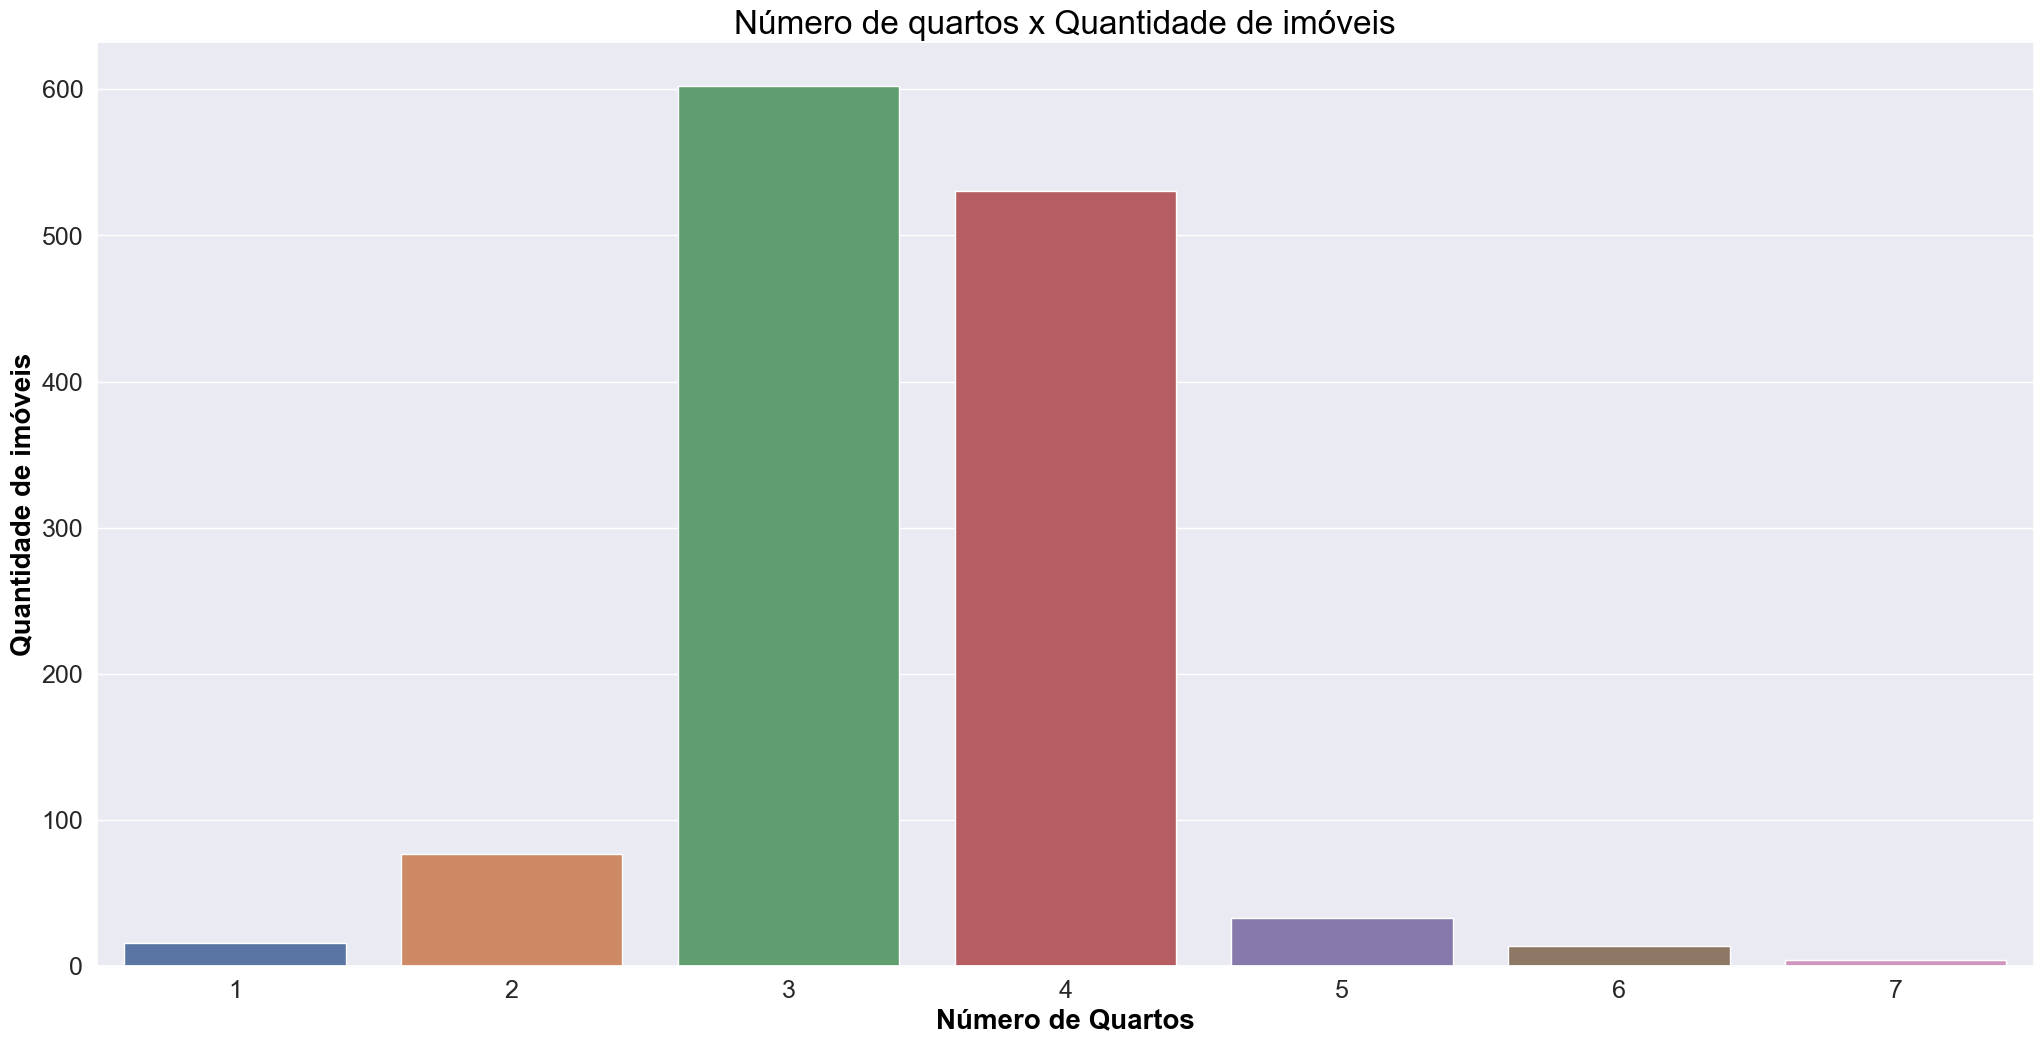

In [39]:
# Número de quartos x Quantidade de imóveis
sns.countplot(data = df_centro, x = 'bedrooms');
fontdict={'fontsize': 24,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Número de Quartos', fontsize = 20, fontweight = 'bold', color = 'black');
plt.ylabel('Quantidade de imóveis', fontsize = 20, fontweight = 'bold', color = 'black');
plt.title('Número de quartos x Quantidade de imóveis', fontdict = fontdict, color = 'black',position=(0.5,1));

#### Banheiros

In [40]:
df_centro['bathrooms'].describe()

count   1276.00
mean       3.62
std        1.53
min        1.00
25%        3.00
50%        4.00
75%        5.00
max        9.00
Name: bathrooms, dtype: float64

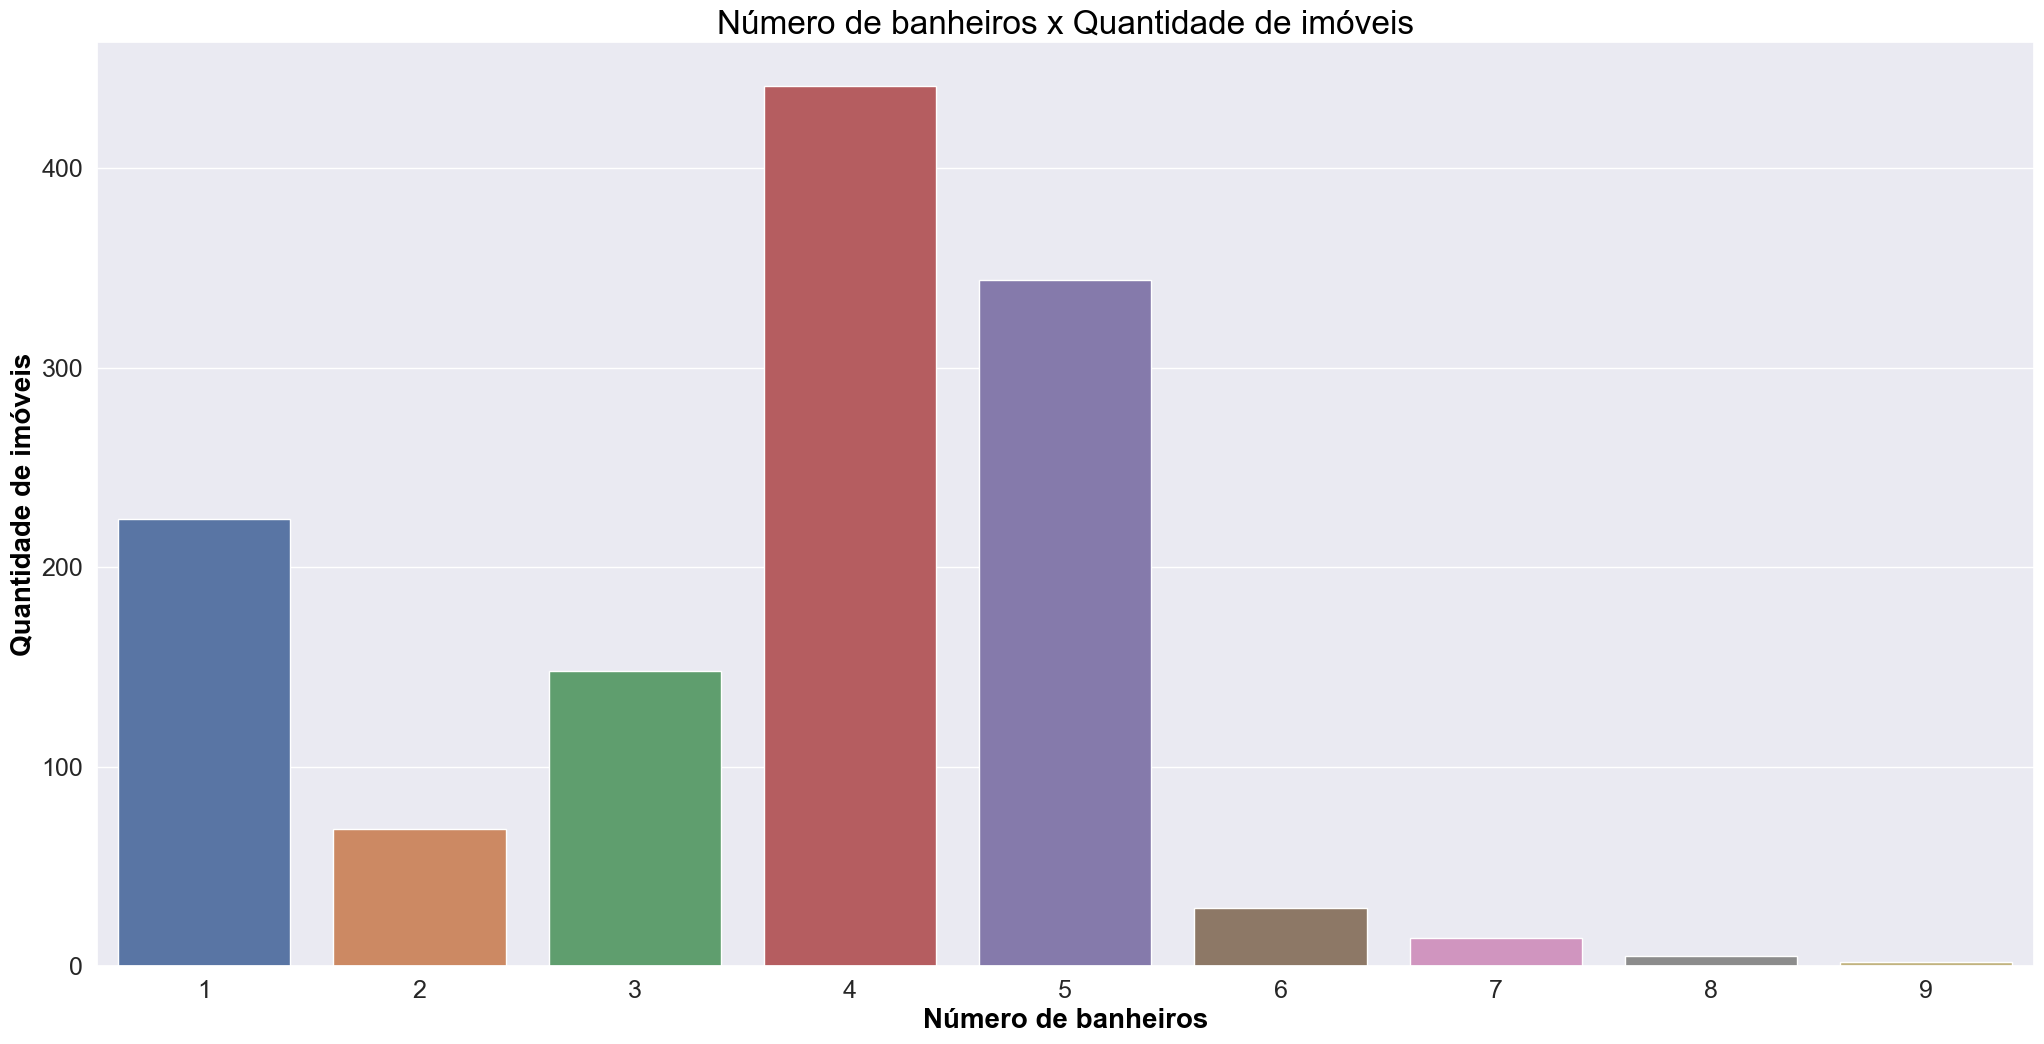

In [41]:
# Número de banheiros x Quantidade de imóveis
sns.countplot(data = df_centro, x = 'bathrooms');
fontdict={'fontsize': 24,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Número de banheiros', fontsize = 20, fontweight = 'bold', color = 'black');
plt.ylabel('Quantidade de imóveis', fontsize = 20, fontweight = 'bold', color = 'black');
plt.title('Número de banheiros x Quantidade de imóveis', fontdict = fontdict, color = 'black',position=(0.5,1));

#### Área apartamento

In [42]:
df_centro['usable_area'].describe()

count   1276.00
mean     171.46
std       87.36
min       14.00
25%      120.75
50%      149.00
75%      197.00
max      815.00
Name: usable_area, dtype: float64

In [43]:
df_centro[['usable_area','bathrooms','bedrooms','parking_spaces']].describe()

,usable_area,bathrooms,bedrooms,parking_spaces
count,1276.00,1276.00,1276.00,1276.00
mean,171.46,3.62,3.43,3.08
std,87.36,1.53,0.77,1.21
min,14.00,1.00,1.00,0.00
25%,120.75,3.00,3.00,3.00
50%,149.00,4.00,3.00,3.00
75%,197.00,5.00,4.00,4.00
max,815.00,9.00,7.00,7.00


* A área util média dos aptos corresponde: 171.46 metros quadrados
* A área util mediana dos aptos corresponde: 149.0 metros quadrados

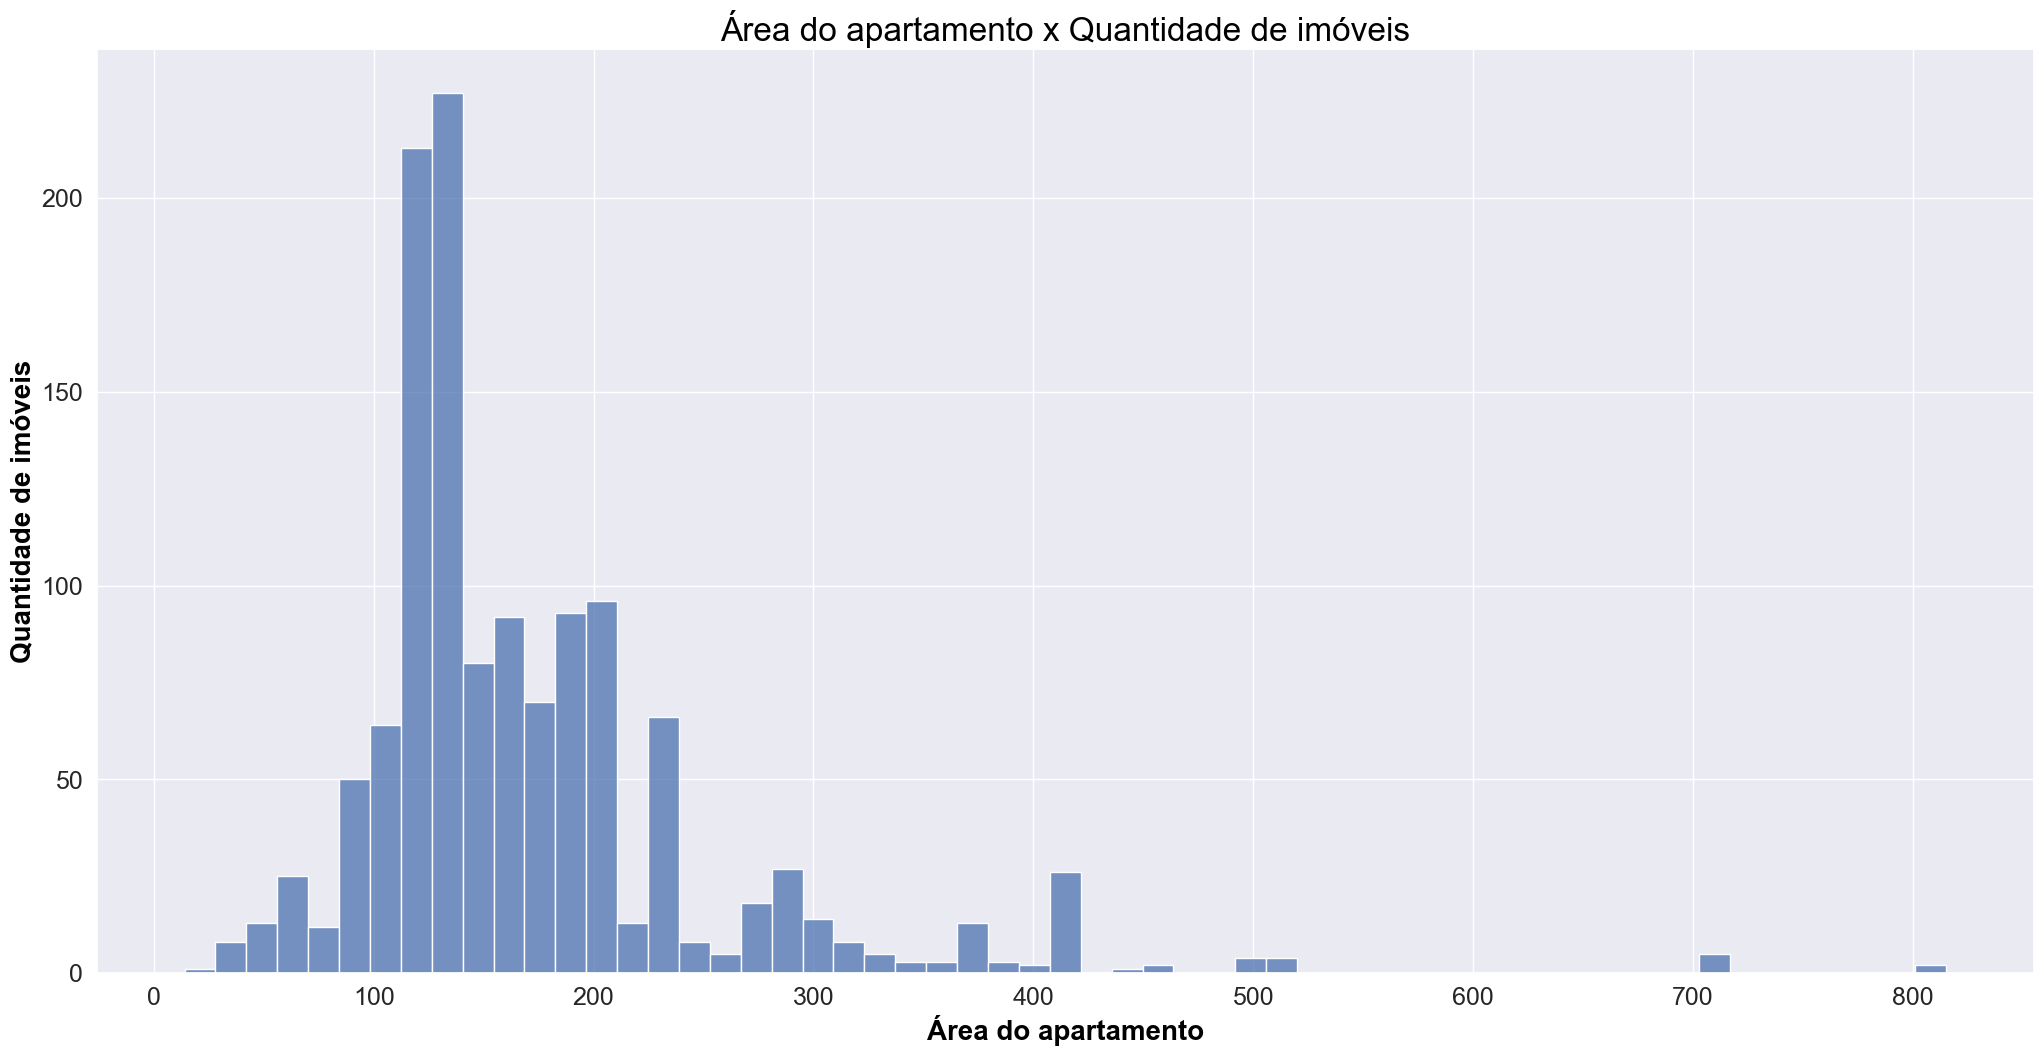

In [44]:
# Área apartamento x Quantidade de imóveis
sns.histplot(data = df_centro, x = 'usable_area');
fontdict={'fontsize': 24,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Área do apartamento', fontsize = 20, fontweight = 'bold', color = 'black');
plt.ylabel('Quantidade de imóveis', fontsize = 20, fontweight = 'bold', color = 'black');
plt.title('Área do apartamento x Quantidade de imóveis', fontdict = fontdict, color = 'black',position=(0.5,1));

In [45]:
# vagas de garagem
df_centro['parking_spaces'].value_counts(normalize=True)

3   0.40
4   0.37
1   0.09
2   0.06
0   0.05
5   0.02
6   0.01
7   0.00
Name: parking_spaces, dtype: float64

**Dos apartamentos de 3 quartos com 2 banheiros localizados no Centro possuem:**
* 40% possuem 3 vagas de garagem.
* 37% possuem 4 vagas de garagem.
* 9%  possuem 1 vaga de garagem.
* 6%  possuem 2 vagas de garagem.

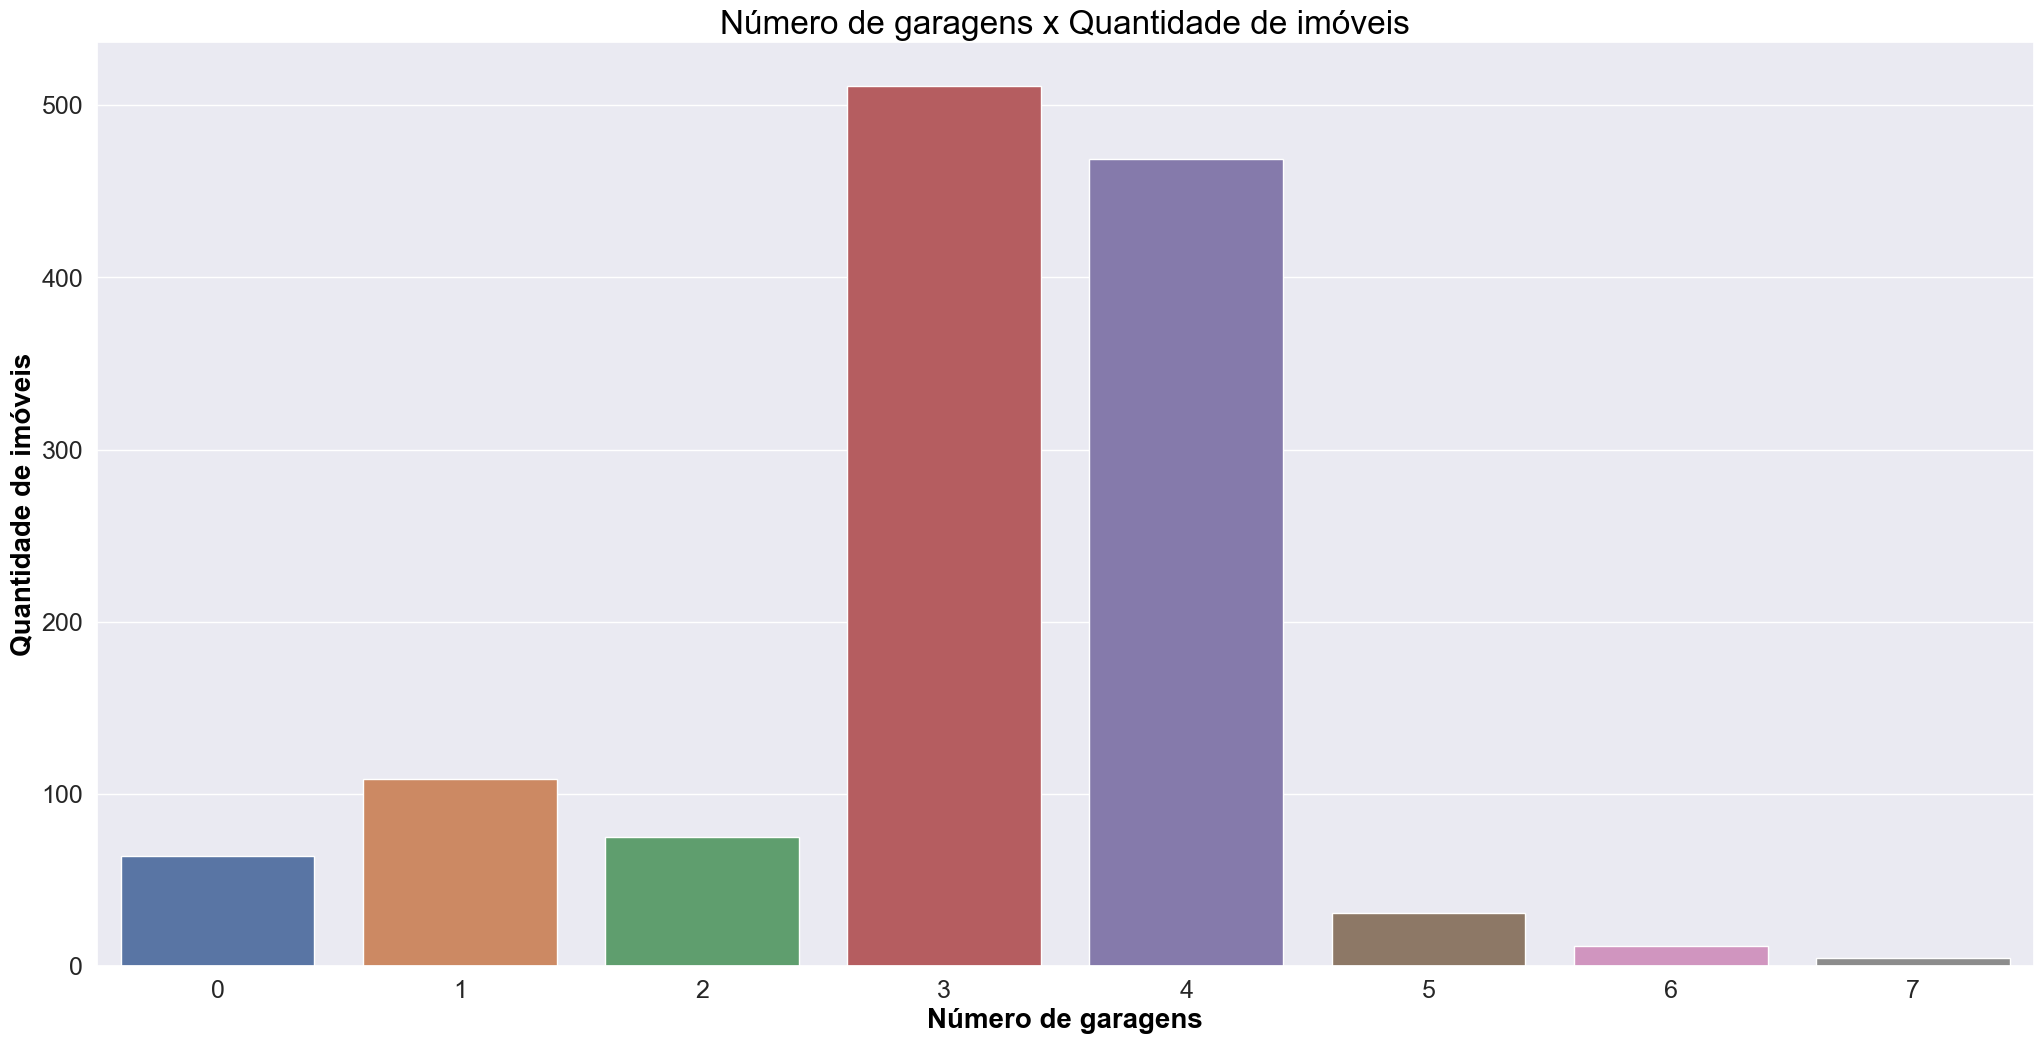

In [46]:
# Número de garagens x Quantidade de imóveis
sns.countplot(data = df_centro, x = 'parking_spaces');
fontdict={'fontsize': 24,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
plt.xlabel('Número de garagens', fontsize = 20, fontweight = 'bold', color = 'black');
plt.ylabel('Quantidade de imóveis', fontsize = 20, fontweight = 'bold', color = 'black');
plt.title('Número de garagens x Quantidade de imóveis', fontdict = fontdict, color = 'black',position=(0.5,1));

### 4.1.2 Informações Apto 3 quartos 2 banheiros - Bairro Centro

In [47]:
df_centro = pd.DataFrame()
# Filtrando dados 
df_centro = ( df4.loc[(df4['address_neighborhood']=='Centro')&(df4['bedrooms']==3)&
                      (df4['bathrooms']==2)&(df4['unit_type']=='APARTMENT')].copy() )

In [48]:
# total de imóveis com esse perfil
df_centro.shape

(40, 42)

In [49]:
df_centro.head()

,listing_id,link_name,link_url,listing_type,listing_title,listing_desc,business_types,unit_type,unit_subtype,property_type,usage_type,sale_price,rental_price,rental_period,yearly_iptu,monthly_condo_fee,amenities,usable_area,total_area,bathrooms,bedrooms,suites,parking_spaces,address_country,address_state,address_city,address_neighborhood,address_street,address_street_number,address_complement,address_zipcode,location_id,advertiser_id,advertiser_name,advertiser_phones,advertiser_whatsapp,advertiser_url,portal,aquisition_date,ano,mes,dia
132,2591986699,"Apartamento com 3 Quartos à venda, 115m²",https://www.vivareal.com.br/imovel/apartamento...,USED,"Apartamento no Hely elena com 3 dorm e 115m, O...","Apartamento 3 dormitorios frente Mar,em Itapem...","[""SALE""]",APARTMENT,no_description,UNIT,RESIDENTIAL,1679840.00,0.00,venda,1200.00,800.00,"[""BARBECUE_GRILL"", ""ELEVATOR"", ""GOURMET_SPACE""...",115.00,115.00,2,3,1,1,BR,SC,Itapema,Centro,Avenida Nereu Ramos,100,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,0fb716c4-073a-b274-60a8-3640b2458f46,USUÁRIO NEWCORE,"[""11958196257""]",11958196257,https://www.vivareal.com.br/234940/usuario-new...,GRUPOZAP,2022-12-06,2022,12,6
185,2594196109,"Apartamento com 3 Quartos à venda, 135m²",https://www.vivareal.com.br/imovel/apartamento...,USED,Apartamento no Residencial São Francisco de As...,Quadra Mar<br>Vista para o mar<br>Andar alto<b...,"[""SALE""]",APARTMENT,no_description,UNIT,RESIDENTIAL,1699600.00,0.00,venda,2890.00,0.00,"[""BARBECUE_GRILL"", ""PARTY_HALL"", ""ELEVATOR""]",135.00,135.00,2,3,1,1,BR,SC,Itapema,Centro,Avenida Beira Mar,100,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Meia Praia,0fb716c4-073a-b274-60a8-3640b2458f46,USUÁRIO NEWCORE,"[""11958196257""]",11958196257,https://www.vivareal.com.br/234940/usuario-new...,GRUPOZAP,2022-12-06,2022,12,6
1765,2537463146,"Apartamento com 3 Quartos à venda, 101m²",https://www.vivareal.com.br/imovel/apartamento...,USED,APARTAMENTO A VENDA NO EDIFÍCIO ROYAL GARDEN I...,"Valor à vista R$ 839.500,00<br>Valor parcelado...","[""SALE""]",APARTMENT,no_description,UNIT,RESIDENTIAL,839000.00,0.00,venda,0.00,0.00,"[""BARBECUE_GRILL"", ""ELEVATOR"", ""BALCONY"", ""GYM...",101.00,140.00,2,3,1,1,BR,SC,Itapema,Centro,Rua 121,no_description,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,c33c1d33-3282-b51f-ae43-cca22d554052,Imóveis MMD Ltda ME,"[""4733678181"", ""47999181250""]",47999181250,https://www.vivareal.com.br/126358/imoveis-mmd...,GRUPOZAP,2022-12-06,2022,12,6
1777,2566981325,"Apartamento com 3 Quartos à venda, 105m²",https://www.vivareal.com.br/imovel/apartamento...,USED,Apartamento pronto 3 dormitórios Centro Itapem...,Apartamento pronto para morar no Centro de Ita...,"[""SALE""]",APARTMENT,no_description,UNIT,RESIDENTIAL,839500.00,0.00,venda,0.00,0.00,"[""KITCHEN"", ""BALCONY""]",105.00,185.00,2,3,1,1,BR,SC,Itapema,Centro,no_description,no_description,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,cc5bc87d-b746-8b05-90f8-ef61f5020a69,FRANCA FERRAZ IMOBILIARIA,"[""4733630740"", ""47996961130""]",47996961130,https://www.vivareal.com.br/116267/franca-ferr...,GRUPOZAP,2022-12-06,2022,12,6
3306,2594046968,"Apartamento com 3 Quartos à venda, 100m²",https://www.vivareal.com.br/imovel/apartamento...,USED,Apartamento no Edifício Royal Garden em Itapema,ÓTIMA LOCALIZAÇÃO - Apartamento no Edifício Ro...,"[""SALE""]",APARTMENT,no_description,UNIT,RESIDENTIAL,795000.00,0.00,venda,0.00,0.00,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""BALCON...",100.00,100.00,2,3,1,1,BR,SC,Itapema,Centro,Rua 121,55,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,b9662d53-836d-02dd-a511-6cfbe8463dc0,Imobille Negócios Imobiliários,"[""4721256500"", ""47991801111""]",47991801111,https://www.vivareal.com.br/82690/imobille-neg...,GRUPOZAP,2022-12-06,2022,12,6


In [50]:
# area dos apartamentos 3 com 2 banheiros disponiveis
df_centro['usable_area'].describe()

count    40.00
mean    117.97
std      26.36
min      84.00
25%     100.00
50%     113.00
75%     128.25
max     220.00
Name: usable_area, dtype: float64

* A área util média dos aptos de 3 quartos com 2 banheiros corresponde: 117.97 metros quadrados
* A área util mediana dos aptos de 3 quartos com 2 banheiros corresponde: 113.0 metros quadrados

In [51]:
# vagas de garagem
df_centro['parking_spaces'].value_counts(normalize=True)

1   0.88
0   0.07
2   0.05
Name: parking_spaces, dtype: float64

**Dos apartamentos de 3 quartos com 2 banheiros localizados no Centro possuem:**
* 88% possuem 1 vaga de garagem.
* 5%  possuem 2 vagas de garagem.
* 7%  não possuem vaga de garagem.

## 4.2 Cenário Lote / casas disponíveis no bairro Centro

In [52]:
df4['business_types'].unique()

array(['["SALE"]', '["SALE", "RENTAL"]', '["RENTAL"]'], dtype=object)

In [53]:
df_lote = df4.loc[ (df4['business_types']=='["SALE"]')&( (df4['unit_type']=='RESIDENTIAL_ALLOTMENT_LAND') | (df4['unit_type']== 'ALLOTMENT_LAND') | (df4['unit_type']== 'HOME'))].copy()

In [54]:
df_lote.shape

(726, 42)

In [55]:
df_lote.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,726.00,2556421089.37,147564566.82,74121422.00,2560636954.50,2568574730.00,2583772213.00,2597486872.00
sale_price,726.00,2411289.43,6904672.59,175000.00,449000.00,550000.00,1260225.00,79500000.00
rental_price,726.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
yearly_iptu,726.00,415.92,1422.01,0.00,0.00,0.00,500.00,15000.00
monthly_condo_fee,726.00,30.15,183.91,0.00,0.00,0.00,0.00,2000.00
usable_area,726.00,474.74,1881.82,0.00,86.25,116.00,288.00,25000.00
total_area,726.00,500.59,1905.02,0.00,80.00,120.00,300.00,25000.00
bathrooms,726.00,1.98,1.59,0.00,1.00,2.00,3.00,9.00
bedrooms,726.00,2.12,1.51,0.00,2.00,2.00,3.00,10.00
suites,726.00,0.96,1.22,0.00,0.00,1.00,2.00,6.00


In [56]:
df_lote['address_neighborhood'].value_counts()

Morretes                   325
Meia Praia                 106
Sertão do Trombudo          50
Alto São Bento              39
Canto da Praia              38
Centro                      36
Ilhota                      30
Casa Branca                 28
no_description              25
Varzea                      15
Jardim Praia Mar            11
Tabuleiro dos Oliveiras      9
Andorinha                    7
Sertãozinho                  4
Castelo Branco               3
Name: address_neighborhood, dtype: int64

In [57]:
df_lote.loc[df_lote['address_neighborhood']=='Centro'].head()

,listing_id,link_name,link_url,listing_type,listing_title,listing_desc,business_types,unit_type,unit_subtype,property_type,usage_type,sale_price,rental_price,rental_period,yearly_iptu,monthly_condo_fee,amenities,usable_area,total_area,bathrooms,bedrooms,suites,parking_spaces,address_country,address_state,address_city,address_neighborhood,address_street,address_street_number,address_complement,address_zipcode,location_id,advertiser_id,advertiser_name,advertiser_phones,advertiser_whatsapp,advertiser_url,portal,aquisition_date,ano,mes,dia
998,2570287068,"Lote/Terreno à venda, 520m²",https://www.vivareal.com.br/imovel/lote-terren...,USED,Terreno em rua - Bairro Centro em Itapema,O Terreno:<br>* 02 lotes;<br>* 520m².<br><br>F...,"[""SALE""]",RESIDENTIAL_ALLOTMENT_LAND,no_description,UNIT,RESIDENTIAL,3030000.00,0.00,venda,0.00,0.00,[],520.00,520.00,0,0,0,0,BR,SC,Itapema,Centro,Rua 129 A,154,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,703ad00c-ca24-aa67-ac7e-004ce24d7e39,InterPraias Imóveis,"[""4733635655"", ""47991574579""]",47991574579,https://www.vivareal.com.br/521447/interpraias...,GRUPOZAP,2022-12-06,2022,12,6
1023,2578956186,"Lote/Terreno à venda, 890m²",https://www.vivareal.com.br/imovel/lote-terren...,USED,Terreno em Centro - Itapema,TERRENO COM 890M² NO COND. PLAZA ITAPEMA - ALT...,"[""SALE""]",RESIDENTIAL_ALLOTMENT_LAND,no_description,UNIT,RESIDENTIAL,3750000.00,0.00,venda,15000.00,1700.00,"[""GOURMET_BALCONY""]",890.00,890.00,0,0,0,0,BR,SC,Itapema,Centro,Avenida Nereu Ramos,700,no_description,88220972,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,bc0f6406-1483-e4ab-8741-378019a39174,Felipe Leal Imóveis,"[""4833757515"", ""48988150008""]",48988150008,https://www.vivareal.com.br/553787/felipe-leal...,GRUPOZAP,2022-12-06,2022,12,6
1036,2565198126,"Lote/Terreno à venda, 200m²",https://www.vivareal.com.br/imovel/lote-terren...,USED,Terreno à venda no bairro Centro - Itapema/SC,Considerada a cidade com a maior valorização i...,"[""SALE""]",RESIDENTIAL_ALLOTMENT_LAND,no_description,UNIT,RESIDENTIAL,227688.00,0.00,venda,1.00,1.00,"[""NEAR_SCHOOL"", ""ESSENTIAL_PUBLIC_SERVICES""]",200.00,200.00,0,0,0,0,BR,SC,Itapema,Centro,no_description,no_description,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,5dc320f7-1bfd-9bb6-6c4c-45025f21edee,Thiago Vieira Imóveis,"[""48991033549""]",48991033549,https://www.vivareal.com.br/666194/thiago-viei...,GRUPOZAP,2022-12-06,2022,12,6
1072,2571877487,"Lote/Terreno à venda, 200m²",https://www.vivareal.com.br/imovel/lote-terren...,USED,ITAPEMA - Terreno Padrão - Centro,"Terreno urbano à venda, em excelente localizaç...","[""SALE""]",RESIDENTIAL_ALLOTMENT_LAND,no_description,UNIT,RESIDENTIAL,1795500.00,0.00,venda,100.00,0.00,[],200.00,200.00,0,0,0,0,BR,SC,Itapema,Centro,no_description,84,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,c0e60545-529c-e436-2945-1ca32d421676,Auxiliadora Predial - Praias Belas,"[""5133988705"", ""5192537477""]",0,https://www.vivareal.com.br/84477/auxiliadora-...,GRUPOZAP,2022-12-06,2022,12,6
1097,2560639097,"Lote/Terreno à venda, 283m²",https://www.vivareal.com.br/imovel/lote-terren...,USED,Terreno em Centro - Itapema,<b> TERRENO– ITAPEMA </b><br> <br> O terreno f...,"[""SALE""]",RESIDENTIAL_ALLOTMENT_LAND,no_description,UNIT,RESIDENTIAL,1350000.00,0.00,venda,0.00,0.00,[],283.00,283.00,0,0,0,0,BR,SC,Itapema,Centro,no_description,no_description,no_description,88220000,BR>Santa Catarina>NULL>Itapema>Barrios>Centro,63c605b8-da30-a469-c73a-709ed776b9c1,Imobiliária Morada do Sol,"[""4733686988"", ""47991590058""]",47991590058,https://www.vivareal.com.br/73768/imobiliaria-...,GRUPOZAP,2022-12-06,2022,12,6


**possível imóvel escolhido:** 2557742571
